In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 10.0 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 11.288378916846888 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 12.742749857031333 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 14.38449888287663 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 16.237767391887218 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 18.329807108324356 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 20.6913808111479 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 23.357214690901227 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 26.366508987303583 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 point 29.763514416313175 100.0
we get the values for scheme Strg_Fth = 0.9,Stg_C=300,delat16.0 poi

we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 37.926901907322495 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 42.81332398719393 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 48.32930238571752 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 54.5559478116852 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 61.58482110660264 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 69.51927961775604 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 78.47599703514611 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 88.58667904100822 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=200,delat4.0 point 100.0 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=300,delat4.0 point 10.0 100.0
we get the values for scheme Strg_Fth = 0.7,Stg_C=300,delat4.0 point 11.288378916846888 100.0
w

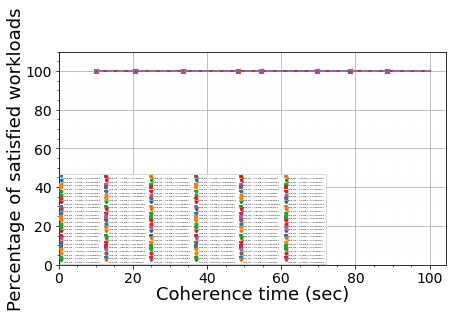

In [5]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_finalv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps



with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)

we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 10.0 17.94222574261679
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 11.288378916846888 17.94222574261679
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 12.742749857031333 17.942226102004653
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 14.38449888287663 17.942245032006326
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 16.237767391887218 17.942310097989207
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 18.329807108324356 17.94253157983539
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 20.6913808111479 17.94324820341401
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 23.357214690901227 17.945634700120806
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 26.366508987303583 17.946047807790016
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.7 point 29.763514416313175 17.953621773629294
we get the values for

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


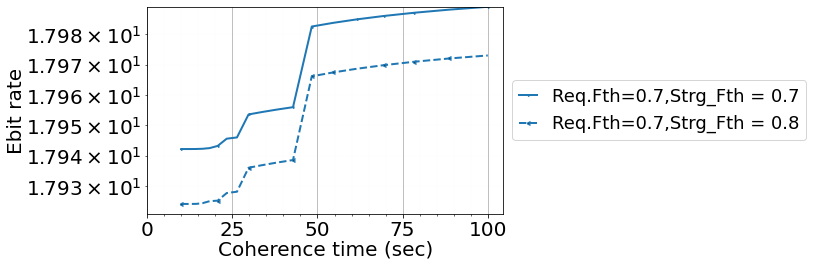

In [11]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
#         print("objective_value",objective_value)
        
        if  ( t_max in [10] and request_fidelity_threshold in [0.7]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9] and storage_block_threshold in [0.8,0.7] and 
             delta in [10] and edge_capacity in [200] and storage_capacity in [400]
            ):
            scheme = "Req.Fth="+str(request_fidelity_threshold)+",Strg_Fth = "+str(storage_block_threshold)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=[objective_value]
            
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Ebit rate",
                        20, 20, 20,
                      20, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_coh_time.pdf",True,2,11.4,3.8,True)

In [ ]:
τ_coh_list = np.linspace(10,10,1)
print(τ_coh_list)

we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 2.0 54.09861186918476
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 4.0 53.92031324316387
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 6.0 53.823143321593115
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 8.0 53.7997382234058
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 10.0 53.791549922347706
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 12.0 53.787737190097005
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 14.0 53.785378816360954
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 16.0 53.78374965209264
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 18.0 53.78249418015051
we get the values for scheme No storage, τ_coh =20sec point 2.0 53.71736393188979
we get the values for scheme No storage, τ_coh =20sec point 4.0 53.71736393188979
we get the values for scheme No storage, τ_coh =20sec point 6.0

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


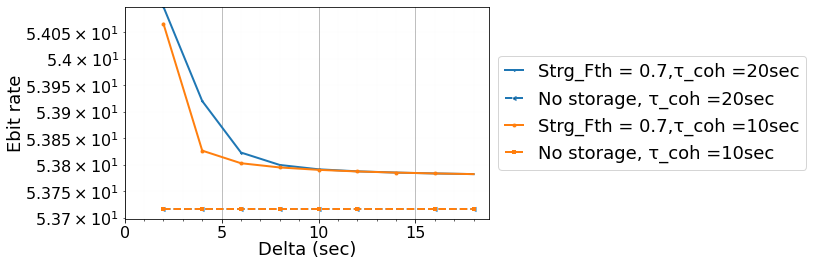

In [29]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [10] and request_fidelity_threshold in [0.7]  and 
             storage_block_threshold in [0.7] and 
              edge_capacity in [600] and storage_capacity in [400] and τ_coh in [20.6913808111479,10.0]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][delta].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][delta]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][delta]=[objective_value]
                    
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)
            τ_coh_values.add(delta)
            scheme2 = "No storage, τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme2][delta].append(53.71736393188979)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme2][delta]= [53.71736393188979]
                except:
                    each_scheme_each_coherence_time_workloads[scheme2]={}
                    each_scheme_each_coherence_time_workloads[scheme2][delta]=[53.71736393188979]
         
            
            if scheme2 not in scheme_keys:
                scheme_keys.add(scheme2)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Delta (sec)","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_delta.pdf",True,2,11.4,3.8,True)

In [ ]:
# plotting 3D Ebit rate as coherence and delta time

# With storage capacity 400 and 1000

# with intermediate edge capacity 200 and 400

τ_coh_values  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]
delta_values [1.0, 1.1139240506329113, 1.2278481012658227, 1.3417721518987342, 1.4556962025316456, 1.5696202531645569, 1.6835443037974684, 1.7974683544303798, 1.9113924050632911, 2.0253164556962027, 2.1392405063291138, 2.2531645569620253, 2.367088607594937, 2.481012658227848, 2.5949367088607596, 2.708860759493671, 2.8227848101265822, 2.9367088607594933, 3.050632911392405, 3.1645569620253164, 3.2784810126582276, 3.392405063291139, 3.5063291139240507, 3.620253164556962, 3.7341772151898733, 3.848101265822785, 3.

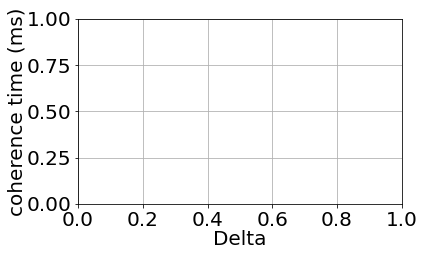

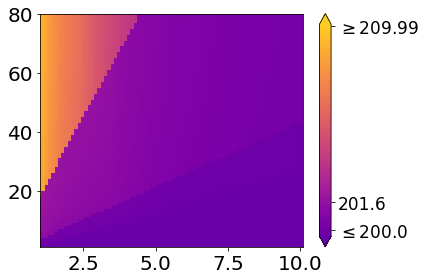

In [3]:
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

each_coh_delata_ebit  ={}
τ_coh_values = []
delta_values = []
            
with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        if  ( t_max in [20] and request_fidelity_threshold in [0.6]  and 
             storage_block_threshold in [0.7] and 
           τ_coh <=100 and  delta <= 10 and    edge_capacity in [200] and storage_capacity in [1000]
            ):
            try:
                each_coh_delata_ebit[τ_coh,delta].append(objective_value)
            except:
                each_coh_delata_ebit[τ_coh,delta] = [objective_value]
                    
            if τ_coh not in τ_coh_values:
                τ_coh_values.append(τ_coh)
            if delta not in delta_values:
                delta_values.append(delta)

X = []
Y =[]
Z = []
rate_or_utility_values = []
τ_coh_values.sort()
delta_values.sort()
print("τ_coh_values ",τ_coh_values)
print("delta_values",delta_values)

for delta in delta_values:
    for τ_coh in τ_coh_values:
        if (τ_coh,delta) in each_coh_delata_ebit:
            ebits = each_coh_delata_ebit[τ_coh,delta]
            avg_ebits = sum(ebits)/len(ebits)
            X.append(delta)
            Y.append(τ_coh)
            Z.append(avg_ebits)

print("Z ",min(Z),sum(Z)/len(Z),max(Z))
plotting_3D("Delta","coherence time (ms)","Ebit rate",
                          20, 20, 20,
                          20, 0, 0,
                          0,0,
                          500,
                          X,Y,Z,round(min(Z),2),round(sum(Z)/len(Z),2),round(max(Z),2),
                          False,True,
                          False,1,
                          24,"plots/3D_delta_coherence_ebit_rate.pdf",
                          False,3,6,3.6)

In [ ]:
import numpy as np
τ_coh_list = np.linspace(1,2,40)
print(τ_coh_list)

In [16]:
# -*- coding: utf-8 -*-
"""HW1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Y6bs0pAuzSveY8svvbR7zr0l9c-eZCkl
"""

# Assuming bias=False reduces the parameter count in Conv2d layers

# Convolutional layers parameters (without bias)
# Updated counts based on the provided structure
conv_params_corrected = (3**2 * 3 * 64) + (3**2 * 64 * 128) + (3**2 * 128 * 256) + (3**2 * 256 * 256) + \
                        (3**2 * 256 * 512) + (3**2 * 512 * 512) * 3

# Batch Normalization layers parameters
# There are 8 BN layers, each corresponding to the output channels of Conv layers
bn_params_corrected = 2 * (64 + 128 + 2*256 + 4*512)

# Fully Connected layer parameters (correcting for including bias this time)
fc_params_corrected = 512 * 10 + 10  # Including bias

# Total parameters corrected
total_params_corrected = conv_params_corrected + bn_params_corrected + fc_params_corrected
total_params_corrected

9228362